# 线性回归和梯度下降
我们会学习一个比较简单的模型--线性回归，同时也会学习一个优化算法--梯度下降法，对这个模型进行优化。线性回归是监督学习里面一个非常简单的模型，同时梯度下降也是深度学习中应用最广的优化算法，我们将从这里开始我们的深度学习之旅。

假设我们有变量 $x_i$ 和目标 $y_i$，每个 i 对应于一个数据点，希望建立一个模型

$$
\hat{y}_i = w x_i + b
$$

$\hat{y}_i$ 是我们预测的结果，希望通过 $\hat{y}_i$ 来拟合目标 $y_i$，通俗来讲就是找到这个函数拟合 $y_i$ 使得误差最小，即最小化损失函数

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

那么如何最小化这个损失函数呢

这里需要用到**梯度下降**

## 2. 梯度下降法
在梯度下降法中，我们首先要明确梯度的概念，随后我们再了解如何使用该方法。

梯度在数学上就是导数，如果是一个多元函数，那么梯度就是偏导数。比如一个函数f(x, y)，那么 f 的梯度就是 

$$
(\frac{\partial f}{\partial x},\ \frac{\partial f}{\partial y})
$$

可以称为 grad f(x, y) 或者 $\nabla f(x, y)$。具体某一点 $(x_0,\ y_0)$ 的梯度就是 $\nabla f(x_0,\ y_0)$。

下面这个图片是 $f(x) = x^2$ 这个函数在 x=1 处的梯度

![](https://ws3.sinaimg.cn/large/006tNc79ly1fmarbuh2j3j30ba0b80sy.jpg)

梯度有什么意义呢？从几何意义来讲，一个点的梯度值是这个函数变化最快的地方，具体来说，对于函数 f(x, y)，在点 $(x_0, y_0)$ 处，沿着梯度 $\nabla f(x_0,\ y_0)$ 的方向，函数增加最快，也就是说沿着梯度的方向，我们能够更快地找到函数的极大值点，或者反过来沿着梯度的反方向，我们能够更快地找到函数的最小值点。

### 2.2 梯度下降法
有了对梯度的理解，我们就能了解梯度下降的原理了。上面我们需要最小化这个误差，也就是需要找到这个误差的最小值点，那么沿着梯度的反方向我们就能够找到这个最小值点。

我们可以来看一个直观的解释。比如我们在一座大山上的某处位置，由于我们不知道怎么下山，于是决定走一步算一步，也就是在每走到一个位置的时候，求解当前位置的梯度，沿着梯度的负方向，也就是当前最陡峭的位置向下走一步，然后继续求解当前位置梯度，向这一步所在位置沿着最陡峭最易下山的位置走一步。这样一步步的走下去，一直走到觉得我们已经到了山脚。当然这样走下去，有可能我们不能走到山脚，而是到了某一个局部的山峰低处。

类比我们的问题，就是沿着梯度的反方向，我们不断改变 w 和 b 的值，最终找到一组最好的 w 和 b 使得误差最小。

在更新的时候，我们需要决定每次更新的幅度，比如在下山的例子中，我们需要每次往下走的那一步的长度，这个长度称为学习率，用 $\eta$ 表示，这个学习率非常重要，不同的学习率都会导致不同的结果，学习率太小会导致下降非常缓慢，学习率太大又会导致跳动非常明显，可以看看下面的例子

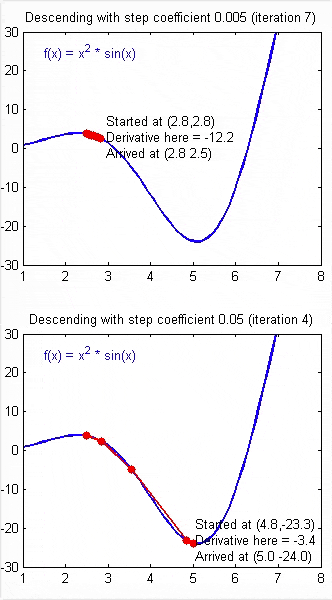

可以看到上面的学习率较为合适，而下面的学习率太大，就会导致不断跳动

更新公式就是

$$
w := w - \eta \frac{\partial f(w,\ b)}{\partial w} \\
b := b - \eta \frac{\partial f(w,\ b)}{\partial b}
$$

通过不断地迭代更新，最终我们能够找到一组最优的 w 和 b，这就是梯度下降法的原理。

最后可以通过这张图形象地说明一下这个方法

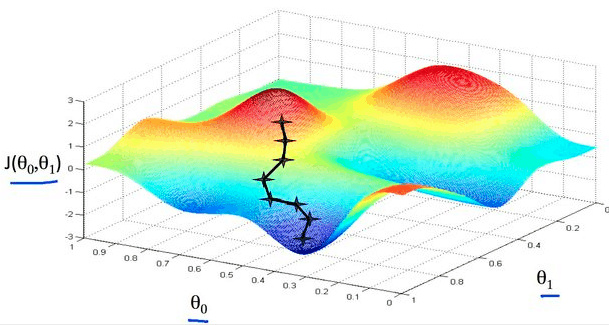

### 2.3 代码实现

上面是原理部分，下面通过一个例子来进一步学习线性模型

In [21]:
import torch
import numpy as np
from torch.autograd import Variable

torch.manual_seed(2019)

In [22]:
# 读入数据 x 和 y
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

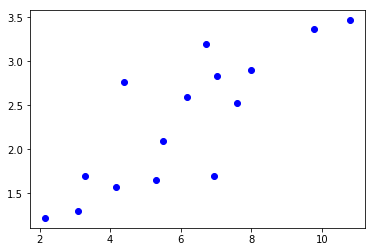

In [23]:
# 画出图像
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x_train, y_train, 'bo')

In [24]:
# 转换成 Tensor
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

# 定义参数 w 和 b
w = Variable(torch.randn(1), requires_grad=True) # 随机初始化
b = Variable(torch.zeros(1), requires_grad=True) # 使用 0 进行初始化

In [25]:
# 构建线性回归模型
x_train = Variable(x_train)
y_train = Variable(y_train)

def linear_model(x):
    return x * w + b

In [26]:
y_ = linear_model(x_train)

经过上面的步骤我们就定义好了模型，在进行参数更新之前，我们可以先看看模型的输出结果长什么样

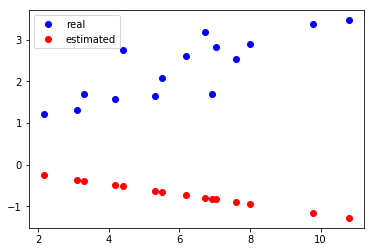

In [27]:
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

这个时候需要计算我们的误差函数，也就是

$$
\frac{1}{n} \sum_{i=1}^n(\hat{y}_i - y_i)^2
$$

In [28]:
# 计算误差
def get_loss(y_, y):
    return torch.mean((y_ - y) ** 2)

loss = get_loss(y_, y_train)

In [29]:
# 打印一下看看 loss 的大小
print(loss)

tensor(10.2335, grad_fn=<MeanBackward1>)


定义好了误差函数，接下来我们需要计算 w 和 b 的梯度了，这时得益于 PyTorch 的自动求导，我们不需要手动去算梯度，有兴趣的同学可以手动计算一下，w 和 b 的梯度分别是

$$
\frac{\partial}{\partial w} = \frac{2}{n} \sum_{i=1}^n x_i(w x_i + b - y_i) \\
\frac{\partial}{\partial b} = \frac{2}{n} \sum_{i=1}^n (w x_i + b - y_i)
$$

In [30]:
# 自动求导
loss.backward()

In [31]:
# 查看 w 和 b 的梯度
print(w.grad)
print(b.grad)

tensor([-41.1289])
tensor([-6.0890])


In [32]:
# 更新一次参数
lr=1e-2
w.data = w.data - lr * w.grad.data
b.data = b.data - lr * b.grad.data

更新完成参数之后，我们再一次看看模型输出的结果

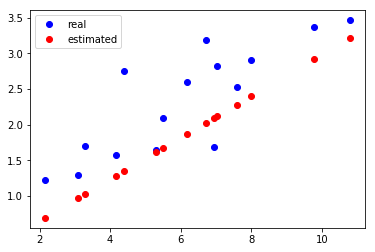

In [33]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

从上面的例子可以看到，更新之后红色的线跑到了蓝色的线下面，没有特别好的拟合蓝色的真实值，所以我们需要在进行几次更新

In [34]:
for e in range(2000): # 进行 10 次更新
    y_ = linear_model(x_train)
    loss = get_loss(y_, y_train)
    w.grad.zero_() # 记得归零梯度
    b.grad.zero_() # 记得归零梯度

    loss.backward()
    
    w.data = w.data - 1e-2 * w.grad.data # 更新 w
    b.data = b.data - 1e-2 * b.grad.data # 更新 b 
    if e%50==0:
        print('epoch: {}, loss: {}'.format(e, loss.item()))

epoch: 0, loss: 0.4142104387283325
epoch: 50, loss: 0.2154277265071869
epoch: 100, loss: 0.20488114655017853
epoch: 150, loss: 0.19672591984272003
epoch: 200, loss: 0.19041983783245087
epoch: 250, loss: 0.1855437308549881
epoch: 300, loss: 0.1817733198404312
epoch: 350, loss: 0.1788577139377594
epoch: 400, loss: 0.1766032874584198
epoch: 450, loss: 0.17486006021499634
epoch: 500, loss: 0.1735120564699173
epoch: 550, loss: 0.17246975004673004
epoch: 600, loss: 0.1716638058423996
epoch: 650, loss: 0.17104054987430573
epoch: 700, loss: 0.1705586016178131
epoch: 750, loss: 0.17018604278564453
epoch: 800, loss: 0.16989785432815552
epoch: 850, loss: 0.1696750521659851
epoch: 900, loss: 0.16950277984142303
epoch: 950, loss: 0.16936954855918884
epoch: 1000, loss: 0.16926653683185577
epoch: 1050, loss: 0.16918689012527466
epoch: 1100, loss: 0.16912531852722168
epoch: 1150, loss: 0.16907764971256256
epoch: 1200, loss: 0.16904084384441376
epoch: 1250, loss: 0.1690123826265335
epoch: 1300, loss: 0

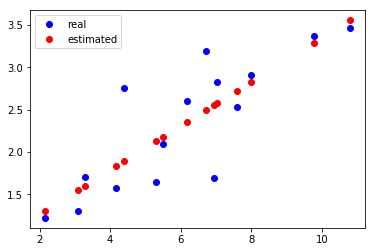

In [35]:
y_ = linear_model(x_train)
plt.plot(x_train.data.numpy(), y_train.data.numpy(), 'bo', label='real')
plt.plot(x_train.data.numpy(), y_.data.numpy(), 'ro', label='estimated')
plt.legend()

经过 2000 次更新，我们发现红色的预测结果已经比较好的拟合了蓝色的真实值。